## PART 1: DATA PREPROCESSING

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, precision_recall_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


In [6]:
# Read the Dataset
df = pd.read_csv('dataset.csv')
df

,gender,age,maritalStatus,children,education,income,destination,passanger,weather,temperature,...,visitCoffeeHouse,visitFastFood,visitFoodCourt,visitRestaurant,storeType,offerEndSoon,moreThan5km,moreThan15km,sameDirection,stopBy(y)
0,Female,21,Partner,0,College,$87500 - $99999,Others,Friends,Sunny,28,...,very often,often,often,rarely,Food Court,Yes,0,0,0,1
1,Female,26,Married,0,Graduate degree,$50000 - $62499,Others,Partner,Sunny,28,...,rarely,rarely,very often,rarely,Coffee House,No,0,0,0,0
2,Female,31,Married,0,College,$100000 or More,Home,Alone,Sunny,28,...,rarely,very often,often,sometimes,Coffee House,Yes,0,0,1,1
3,Male,46,Single,0,College,Less than $12500,Others,Friends,Sunny,0,...,often,sometimes,rarely,sometimes,Fast Food,No,1,0,0,1
4,Female,21,Married,1,College,$25000 - $37499,Work,Alone,Sunny,13,...,very often,sometimes,very often,sometimes,Coffee House,Yes,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12367,Female,31,Married,1,College,$12500 - $24999,Others,Friends,Sunny,28,...,NaN,often,often,NaN,Fast Food,Yes,1,0,0,1
12368,Female,36,Married,0,Bachelors degree,$25000 - $37499,Home,Alone,Rainy,13,...,sometimes,often,often,often,Coffee House,Yes,0,0,1,0
12369,Female,21,Partner,0,Associates degree,$75000 - $87499,Work,Alone,Sunny,13,...,rarely,sometimes,sometimes,rarely,Coffee House,Yes,1,1,0,0
12370,Male,31,Married,0,College,$100000 or More,Work,Alone,Sunny,28,...,never,often,sometimes,sometimes,Fast Food,Yes,0,0,1,1


In [7]:
# Check the information of the dataset
# Dataframe's general information like the columns, types of the data and missing value's counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12372 entries, 0 to 12371
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            12372 non-null  object
 1   age               12372 non-null  int64 
 2   maritalStatus     12372 non-null  object
 3   children          12372 non-null  int64 
 4   education         12372 non-null  object
 5   income            12372 non-null  object
 6   destination       12372 non-null  object
 7   passanger         12372 non-null  object
 8   weather           12372 non-null  object
 9   temperature       12372 non-null  int64 
 10  time              12372 non-null  int64 
 11  visitPub          12267 non-null  object
 12  visitCoffeeHouse  12158 non-null  object
 13  visitFastFood     12224 non-null  object
 14  visitFoodCourt    12244 non-null  object
 15  visitRestaurant   12186 non-null  object
 16  storeType         12372 non-null  object
 17  offerEndSoon

In [8]:
# Dataframe's statistical summary
df.describe()

,age,children,temperature,time,moreThan5km,moreThan15km,sameDirection,stopBy(y)
count,12372.000000,12372.000000,12372.000000,12372.000000,12372.000000,12372.000000,12372.000000,12372.000000
mean,32.906240,0.413919,18.343033,13.819835,0.561510,0.119463,0.215002,0.568704
std,11.579339,0.492554,10.863280,5.408967,0.496222,0.324346,0.410840,0.495277
min,18.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,13.000000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,28.000000,14.000000,1.000000,0.000000,0.000000,1.000000
75%,41.000000,1.000000,28.000000,18.000000,1.000000,0.000000,0.000000,1.000000
max,55.000000,1.000000,28.000000,22.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.duplicated().sum()

100

In [10]:
df.drop_duplicates()

,gender,age,maritalStatus,children,education,income,destination,passanger,weather,temperature,...,visitCoffeeHouse,visitFastFood,visitFoodCourt,visitRestaurant,storeType,offerEndSoon,moreThan5km,moreThan15km,sameDirection,stopBy(y)
0,Female,21,Partner,0,College,$87500 - $99999,Others,Friends,Sunny,28,...,very often,often,often,rarely,Food Court,Yes,0,0,0,1
1,Female,26,Married,0,Graduate degree,$50000 - $62499,Others,Partner,Sunny,28,...,rarely,rarely,very often,rarely,Coffee House,No,0,0,0,0
2,Female,31,Married,0,College,$100000 or More,Home,Alone,Sunny,28,...,rarely,very often,often,sometimes,Coffee House,Yes,0,0,1,1
3,Male,46,Single,0,College,Less than $12500,Others,Friends,Sunny,0,...,often,sometimes,rarely,sometimes,Fast Food,No,1,0,0,1
4,Female,21,Married,1,College,$25000 - $37499,Work,Alone,Sunny,13,...,very often,sometimes,very often,sometimes,Coffee House,Yes,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12367,Female,31,Married,1,College,$12500 - $24999,Others,Friends,Sunny,28,...,NaN,often,often,NaN,Fast Food,Yes,1,0,0,1
12368,Female,36,Married,0,Bachelors degree,$25000 - $37499,Home,Alone,Rainy,13,...,sometimes,often,often,often,Coffee House,Yes,0,0,1,0
12369,Female,21,Partner,0,Associates degree,$75000 - $87499,Work,Alone,Sunny,13,...,rarely,sometimes,sometimes,rarely,Coffee House,Yes,1,1,0,0
12370,Male,31,Married,0,College,$100000 or More,Work,Alone,Sunny,28,...,never,often,sometimes,sometimes,Fast Food,Yes,0,0,1,1


In [11]:
df.isnull().sum()

gender                0
age                   0
maritalStatus         0
children              0
education             0
income                0
destination           0
passanger             0
weather               0
temperature           0
time                  0
visitPub            105
visitCoffeeHouse    214
visitFastFood       148
visitFoodCourt      128
visitRestaurant     186
storeType             0
offerEndSoon          0
moreThan5km           0
moreThan15km          0
sameDirection         0
stopBy(y)             0
dtype: int64

In [12]:
# Fill missing values with the most frequent value
df = df.fillna(df.mode().iloc[0])

In [24]:
df

,gender,age,maritalStatus,children,education,income,destination,passanger,weather,temperature,...,visitCoffeeHouse,visitFastFood,visitFoodCourt,visitRestaurant,storeType,offerEndSoon,moreThan5km,moreThan15km,sameDirection,stopBy(y)
0,Female,21,Partner,0,College,$87500 - $99999,Others,Friends,Sunny,28,...,very often,often,often,rarely,Food Court,Yes,0,0,0,1
1,Female,26,Married,0,Graduate degree,$50000 - $62499,Others,Partner,Sunny,28,...,rarely,rarely,very often,rarely,Coffee House,No,0,0,0,0
2,Female,31,Married,0,College,$100000 or More,Home,Alone,Sunny,28,...,rarely,very often,often,sometimes,Coffee House,Yes,0,0,1,1
3,Male,46,Single,0,College,Less than $12500,Others,Friends,Sunny,0,...,often,sometimes,rarely,sometimes,Fast Food,No,1,0,0,1
4,Female,21,Married,1,College,$25000 - $37499,Work,Alone,Sunny,13,...,very often,sometimes,very often,sometimes,Coffee House,Yes,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12367,Female,31,Married,1,College,$12500 - $24999,Others,Friends,Sunny,28,...,rarely,often,often,rarely,Fast Food,Yes,1,0,0,1
12368,Female,36,Married,0,Bachelors degree,$25000 - $37499,Home,Alone,Rainy,13,...,sometimes,often,often,often,Coffee House,Yes,0,0,1,0
12369,Female,21,Partner,0,Associates degree,$75000 - $87499,Work,Alone,Sunny,13,...,rarely,sometimes,sometimes,rarely,Coffee House,Yes,1,1,0,0
12370,Male,31,Married,0,College,$100000 or More,Work,Alone,Sunny,28,...,never,often,sometimes,sometimes,Fast Food,Yes,0,0,1,1


In [23]:
df["stopBy(y)"]==1

0         True
1        False
2         True
3         True
4         True
         ...  
12367     True
12368    False
12369    False
12370     True
12371    False
Name: stopBy(y), Length: 12372, dtype: bool

## PART 2 DATA VISUALIZING

In [34]:
sns.__version__

'0.11.2'

### Distribution of the target variable ("stopBy(y)") using a count plot.

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


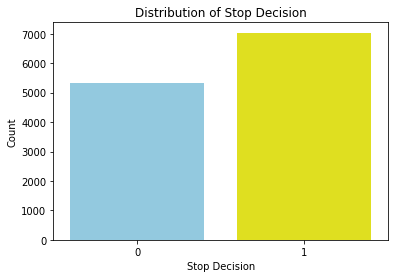

In [33]:
# Explore the distribution of the target variable
plt.figure(figsize=(6, 4))
colors = ["skyblue", "yellow"]
sns.countplot(df["stopBy(y)"],palette=colors)
plt.title("Distribution of Stop Decision")
plt.xlabel("Stop Decision")
plt.ylabel("Count")
plt.show()

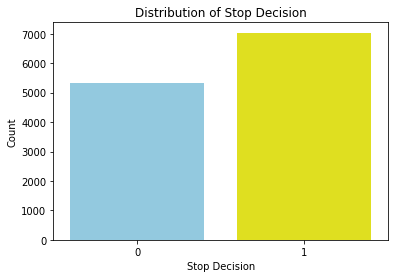

In [38]:
# Explore the distribution of the target variable
plt.figure(figsize=(6, 4))
colors = ["skyblue", "yellow"]
sns.countplot(data = df, x="stopBy(y)",palette=colors)
plt.title("Distribution of Stop Decision")
plt.xlabel("Stop Decision")
plt.ylabel("Count")
plt.show()

### Relationship between age and stop decision using a box plot.

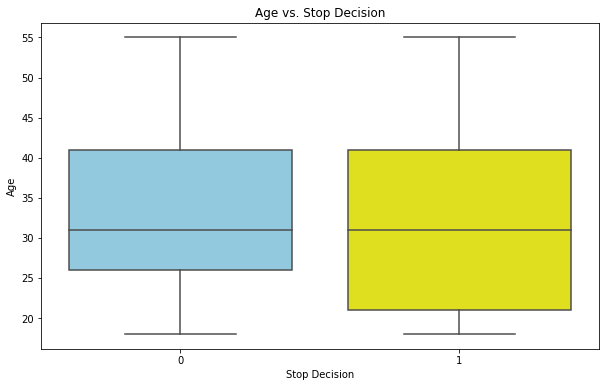

In [28]:
# Explore the relationship between age and stop decision
plt.figure(figsize=(10, 6))
sns.boxplot(x="stopBy(y)", y="age", data=df,palette=colors)
plt.title("Age vs. Stop Decision")
plt.xlabel("Stop Decision")
plt.ylabel("Age")
plt.show()

### Correlation matrix heatmap to visualize the relationships between numerical features.

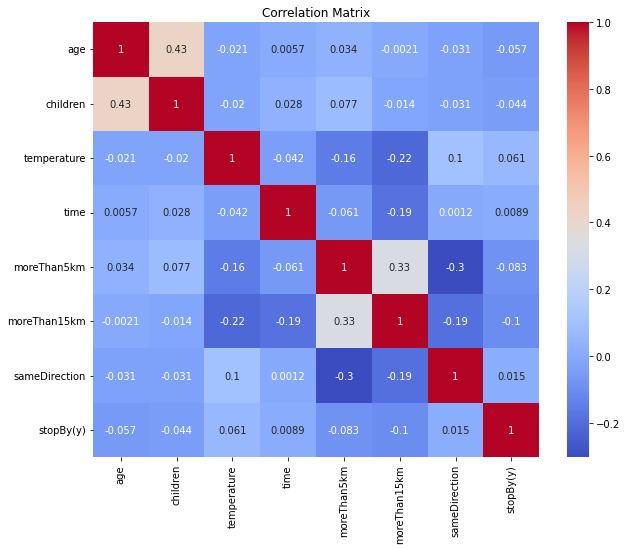

In [29]:
# Explore the correlation between numerical features
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [31]:
!pip install seaborn --upgrade

     -------------------------------------- 293.3/293.3 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Distribution of categorical variables using count plots with hue for the stop decision.

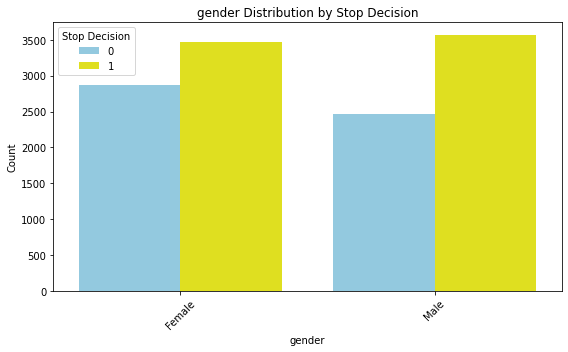

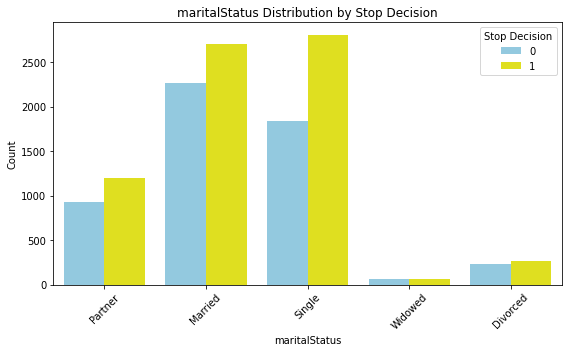

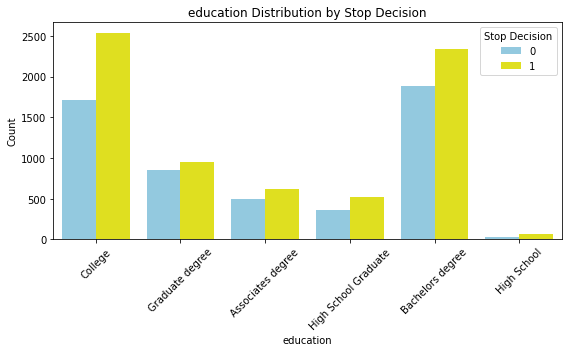

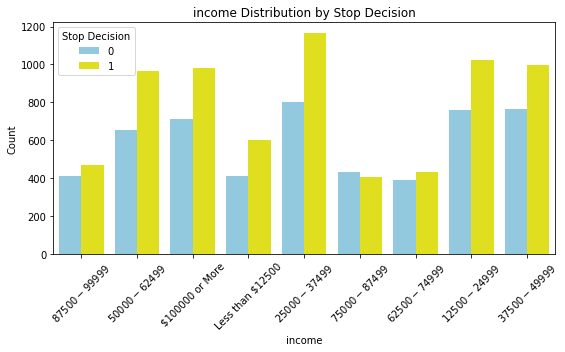

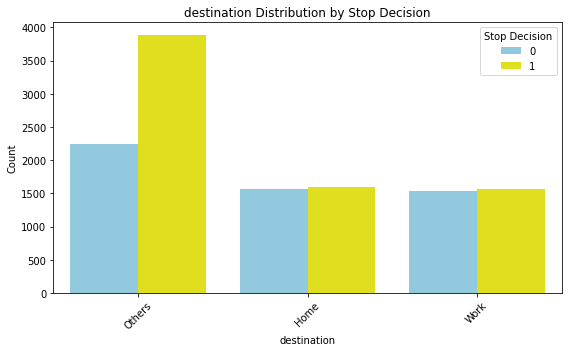

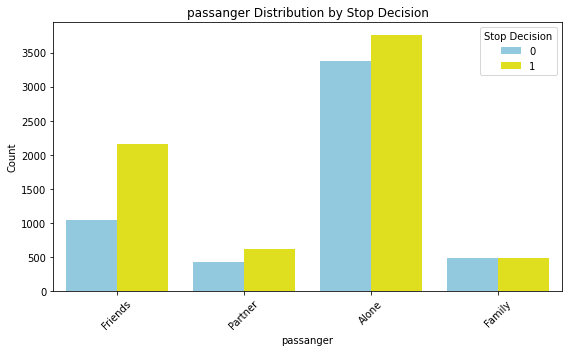

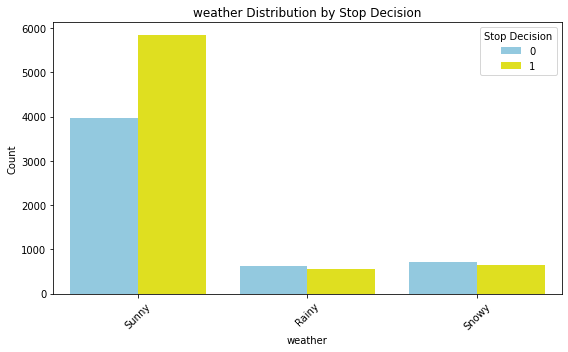

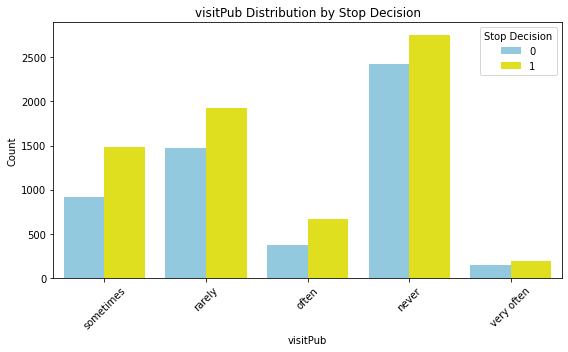

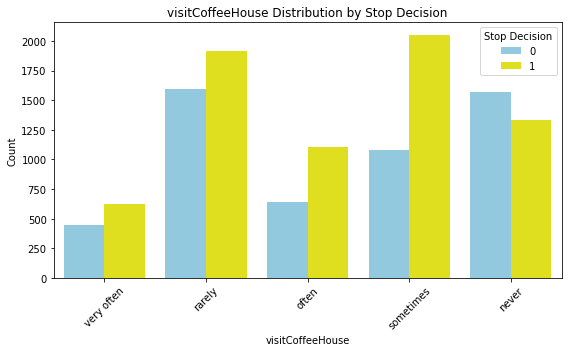

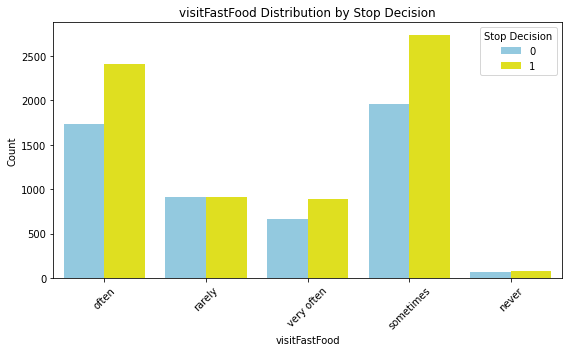

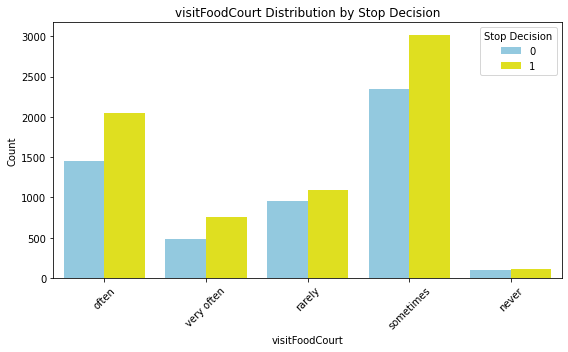

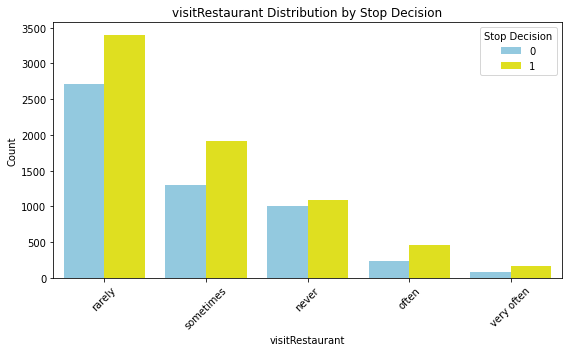

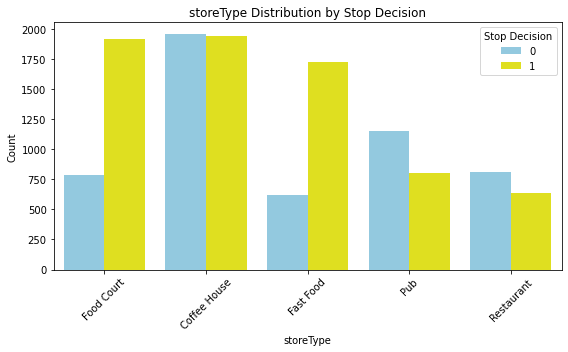

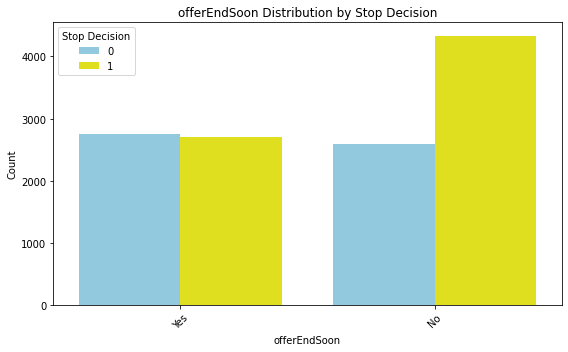

In [46]:
# Explore the distribution of categorical variables
categorical_columns = df.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x= df[column],hue=df["stopBy(y)"],palette=colors)
    plt.title(f"{column} Distribution by Stop Decision")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title="Stop Decision")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Explore the distribution of categorical variables
categorical_columns = df.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(df[column], hue=df["stopBy(y)"],palette=colors)
    plt.title(f"{column} Distribution by Stop Decision")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title="Stop Decision")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


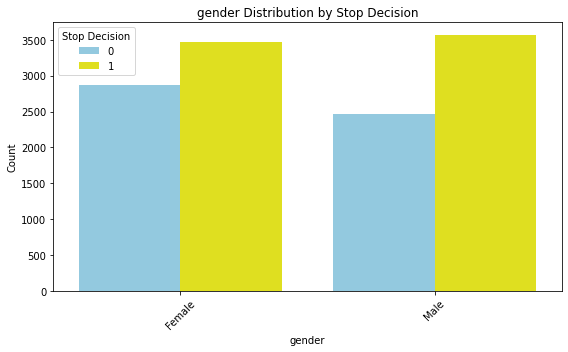

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


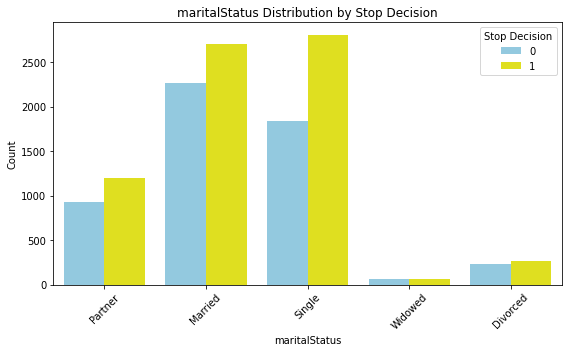

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


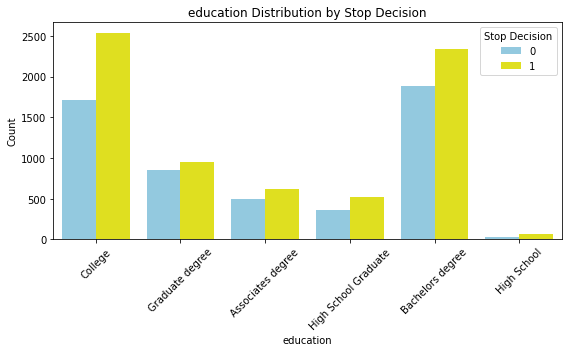

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


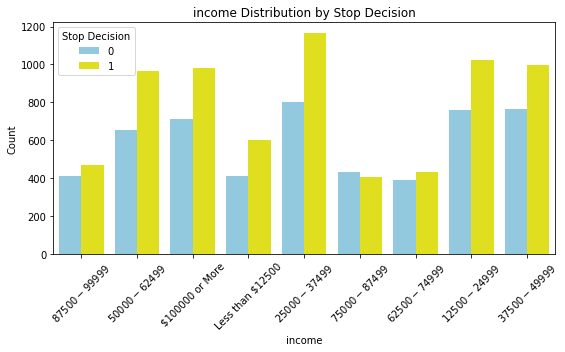

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


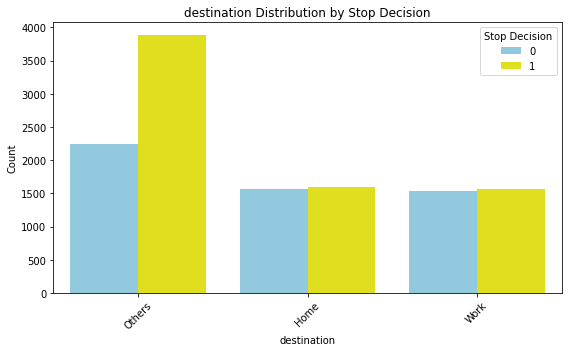

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


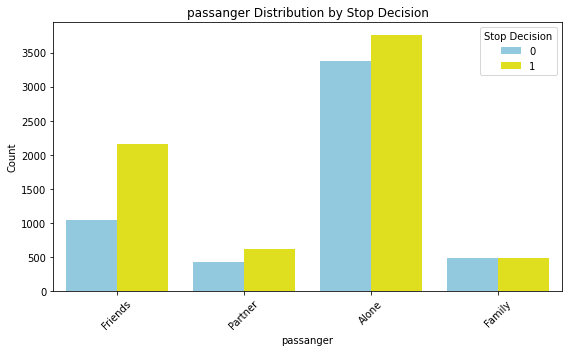

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


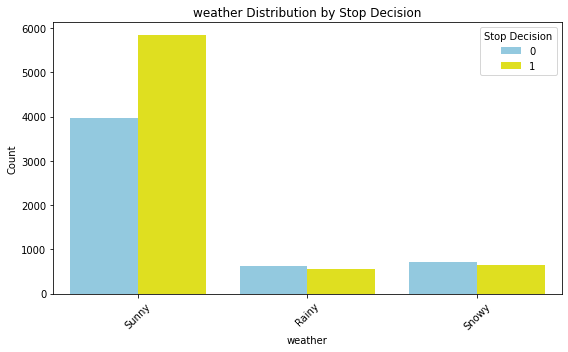

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


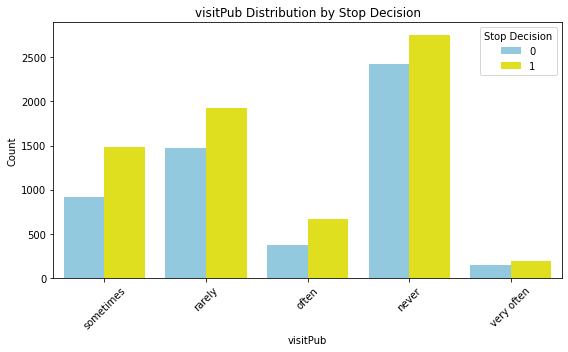

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


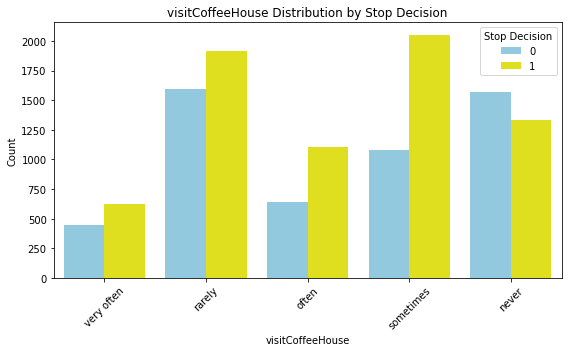

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


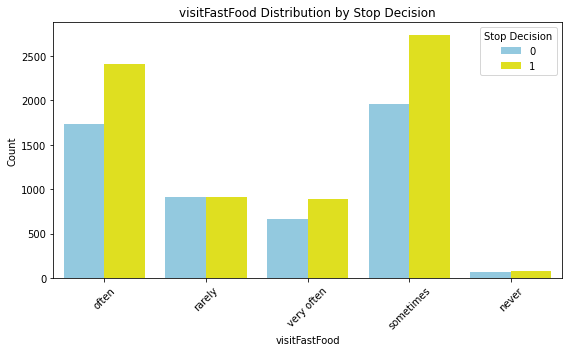

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


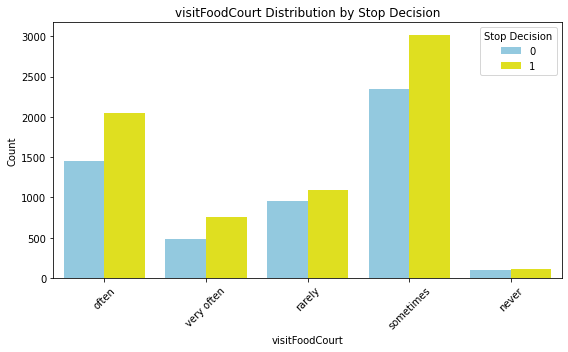

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


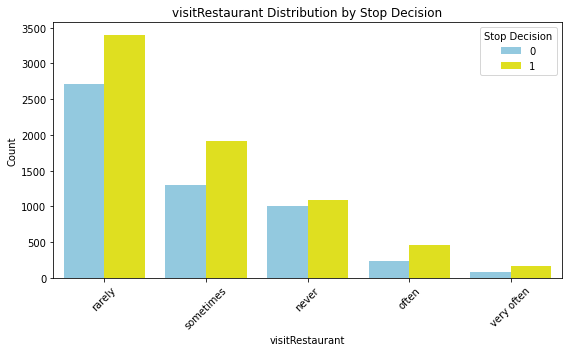

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


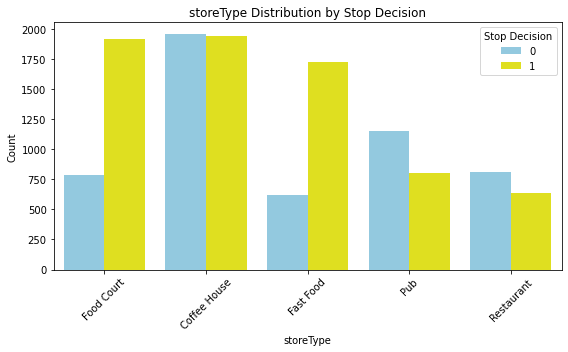

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


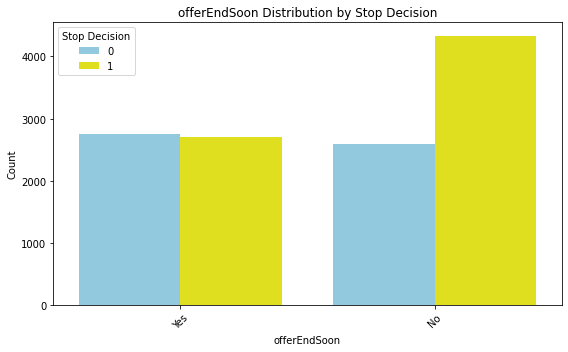

In [32]:
# Explore the distribution of categorical variables
categorical_columns = df.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(df[column], hue=df["stopBy(y)"],palette=colors)
    plt.title(f"{column} Distribution by Stop Decision")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title="Stop Decision")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Model Training and Validation

Model training and validation: select suitable models for the data and perform
training and validation, provide justification for your model selection and
implementation. Give brief explanation of how the models work if necessary.
▪ Model tuning and testing: fine tune the models and perform final testing.

Logistic Regression:
Logistic Regression is a linear classification algorithm used to predict the probability of a binary outcome (0 or 1). It models the relationship between the input features and the probability of the outcome using a logistic function. It's a simple yet effective algorithm for binary classification tasks.

Random Forest:
Random Forest is an ensemble classification algorithm that combines multiple decision trees to make predictions. It's particularly effective in capturing complex relationships in the data. Each decision tree is trained on a bootstrapped subset of the data, and the final prediction is determined by aggregating the predictions of individual trees.

Support Vector Machine (SVM):
SVM is a versatile classification algorithm that aims to find a hyperplane that best separates different classes of data. It tries to maximize the margin between the classes while minimizing the classification error. SVM can handle both linear and non-linear classification tasks by using different kernel functions.

In [13]:
# Separate features and target variable
X = df.drop("stopBy(y)", axis=1)
y = df["stopBy(y)"]

In [14]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize and fit the OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [16]:
# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [17]:
# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [18]:
# Initialize models
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC()

In [19]:
logreg_model.fit(X_train_encoded, y_train)

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
logreg_model.fit(X_train_encoded, y_train)

C:\Users\belle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
rf_model.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [22]:
svm_model.fit(X_train_encoded, y_train)

SVC()

In [23]:
# Evaluate models on validation set
logreg_pred = logreg_model.predict(X_test_encoded )
rf_pred = rf_model.predict(X_test_encoded )
svm_pred = svm_model.predict(X_test_encoded )

In [24]:
# Print classification reports
print("Logistic Regression:")
print(classification_report(y_test, logreg_pred))

print("Random Forest:")
print(classification_report(y_test, rf_pred))

print("Support Vector Machine:")
print(classification_report(y_test, svm_pred))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.66      0.58      0.62      1074
           1       0.71      0.77      0.73      1401

    accuracy                           0.69      2475
   macro avg       0.68      0.67      0.68      2475
weighted avg       0.68      0.69      0.68      2475

Random Forest:
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      1074
           1       0.75      0.81      0.78      1401

    accuracy                           0.74      2475
   macro avg       0.74      0.73      0.73      2475
weighted avg       0.74      0.74      0.74      2475

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.74      0.63      0.68      1074
           1       0.75      0.83      0.78      1401

    accuracy                           0.74      2475
   macro avg       0.74      0.73      0.73      2475
weighted avg  

In [25]:
# Use cross_val_predict to get predictions on the validation set
logreg_pred = cross_val_predict(logreg_model,X_test_encoded ,y_test, cv=5)
rf_pred = cross_val_predict(rf_model,X_test_encoded ,y_test, cv=5)
svm_pred  = cross_val_predict(svm_model,X_test_encoded ,y_test, cv=5)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate the confusion matrix 
conf_matrix_logreg = confusion_matrix(y_test, logreg_pred)
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
conf_matrix_svm = confusion_matrix(y_test, svm_pred)

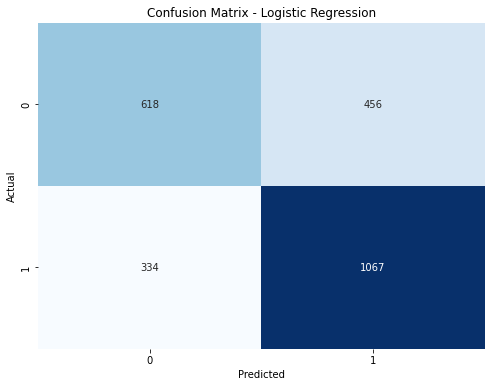

In [27]:
# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

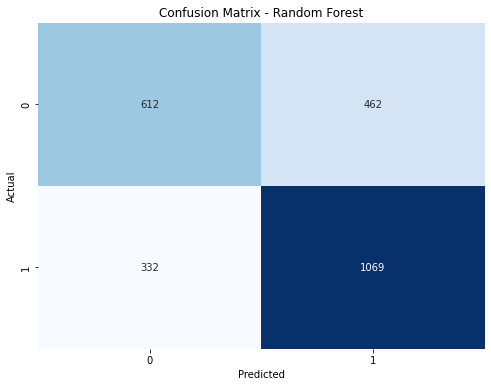

In [28]:
# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

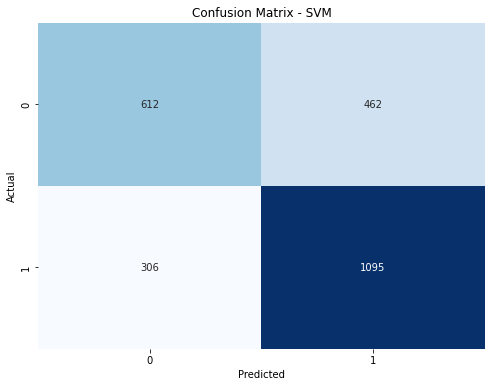

In [29]:
# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

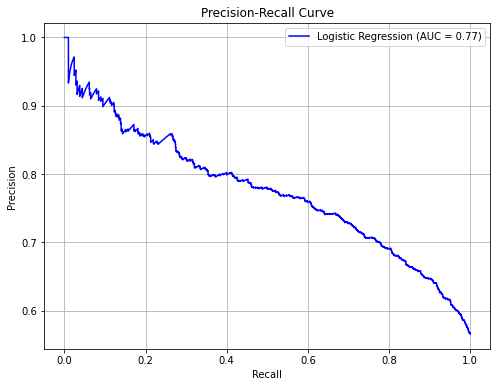

In [30]:
# Predict probabilities for positive class
logreg_probs = logreg_model.predict_proba(X_test_encoded )[:, 1]

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, logreg_probs)

# Compute area under the precision-recall curve
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()



## Features Selection + Models Training

In [31]:
# Separate features and target variable
X = df.drop("stopBy(y)", axis=1)
y = df["stopBy(y)"]

In [32]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Initialize and fit the OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [34]:
# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [35]:
# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [36]:
# Feature selection using Recursive Feature Elimination (RFE)
estimator = RandomForestClassifier(random_state=42)
rfe_selector = RFE(estimator, n_features_to_select=10)  # Select top 10 features
X_train_rfe_selected = rfe_selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_rfe_selected = rfe_selector.transform(X_test_scaled)

In [37]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
logreg_model = LogisticRegression()

# Train models on selected features
rf_model.fit(X_train_rfe_selected, y_train_resampled)
svm_model.fit(X_train_rfe_selected, y_train_resampled)
logreg_model.fit(X_train_rfe_selected, y_train_resampled)

LogisticRegression()

In [38]:
# Predictions on test set with selected features
rf_pred = rf_model.predict(X_test_rfe_selected)
svm_pred = svm_model.predict(X_test_rfe_selected)
logreg_pred = logreg_model.predict(X_test_rfe_selected)

# Print classification reports for selected features
print("Random Forest Classification Report (Selected Features):")
print(classification_report(y_test, rf_pred))

print("Support Vector Machine Classification Report (Selected Features):")
print(classification_report(y_test, svm_pred))

print("Logistic Regression Classification Report (Selected Features):")
print(classification_report(y_test, logreg_pred))

Random Forest Classification Report (Selected Features):
              precision    recall  f1-score   support

           0       0.59      0.55      0.57      1074
           1       0.67      0.71      0.69      1401

    accuracy                           0.64      2475
   macro avg       0.63      0.63      0.63      2475
weighted avg       0.64      0.64      0.64      2475

Support Vector Machine Classification Report (Selected Features):
              precision    recall  f1-score   support

           0       0.59      0.67      0.63      1074
           1       0.72      0.65      0.68      1401

    accuracy                           0.66      2475
   macro avg       0.65      0.66      0.65      2475
weighted avg       0.66      0.66      0.66      2475

Logistic Regression Classification Report (Selected Features):
              precision    recall  f1-score   support

           0       0.57      0.67      0.62      1074
           1       0.71      0.62      0.66      14

## Model Tuning & Testing

In [45]:
# Hyperparameter tuning using GridSearchCV for Random Forest
param_grid_rf = {
    "n_estimators": [50,100, 200, 300,400],
    "max_depth": [None, 5, 10, 20, 25],
    "min_samples_split": [2, 5, 10, 15]
}
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)

In [46]:
# Hyperparameter tuning using GridSearchCV for SVM
param_grid_svm = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"]
}
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)


In [47]:
# Hyperparameter tuning using GridSearchCV for Logistic Regression
param_grid_logreg = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100]  
}
grid_logreg = GridSearchCV(logreg_model, param_grid_logreg, cv=5)


## Prediction on Test Set

In [48]:
# Fit models on resampled data
grid_rf.fit(X_train_resampled, y_train_resampled)
grid_svm.fit(X_train_resampled, y_train_resampled)
grid_logreg.fit(X_train_resampled, y_train_resampled)

# Predictions on test set
rf_pred = grid_rf.predict(X_test_scaled)
svm_pred = grid_svm.predict(X_test_scaled)
logreg_pred = grid_logreg.predict(X_test_scaled)

## Classification Report

In [49]:
# Print classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svm_pred))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      1074
           1       0.75      0.81      0.78      1401

    accuracy                           0.74      2475
   macro avg       0.73      0.73      0.73      2475
weighted avg       0.73      0.74      0.73      2475

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1074
           1       0.77      0.78      0.78      1401

    accuracy                           0.75      2475
   macro avg       0.74      0.74      0.74      2475
weighted avg       0.75      0.75      0.75      2475

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      1074
           1       0.74      0.68      0.71      1401

    accuracy                           0.68      2475
  

## Accuracy

In [54]:
print("Accuracy of Tuned Random Forest Classifier: ", accuracy_score(y_test, rf_pred))
print("Accuracy of Tuned Support Vector Classifier: ", accuracy_score(y_test, svm_pred))
print("Accuracy of Tuned Logistic Regression Classifier: ", accuracy_score(y_test, logreg_pred))

Accuracy of Tuned Random Forest Classifier:  0.7357575757575757
Accuracy of Tuned Support Vector Classifier:  0.7474747474747475
Accuracy of Tuned Logistic Regression Classifier:  0.6804040404040405


## Confusion Matrix

In [60]:
# Generate the confusion matrix 
conf_matrix_logreg = confusion_matrix(y_test, logreg_pred)
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
conf_matrix_svm = confusion_matrix(y_test, svm_pred)

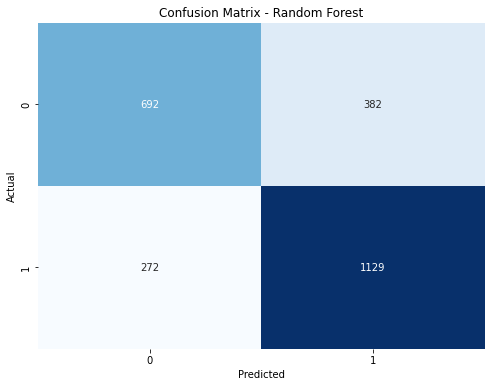

In [64]:
# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

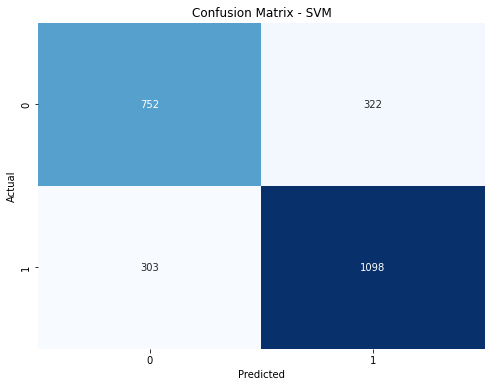

In [65]:
# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

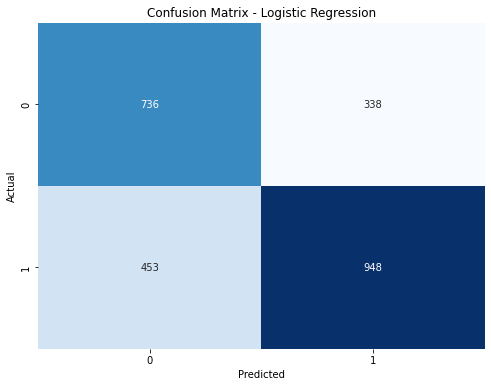

In [67]:
# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [74]:
y_pred_proba_rf = grid_rf.predict_proba(np.array(X_test_scaled))[:,1]

In [76]:
y_pred_proba_logreg = grid_logreg.predict_proba(np.array(X_test_scaled))[:,1]


In [81]:
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_proba_rf)
fpr_logreg, tpr_logreg, thresholds = roc_curve(y_test, y_pred_proba_logreg)


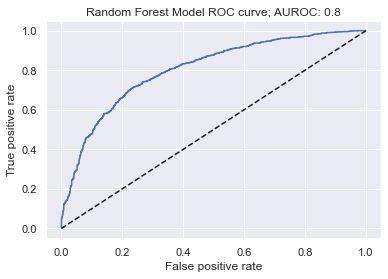

In [82]:
sns.set()

plt.plot(fpr_rf, tpr_rf)

plt.plot(fpr_rf, fpr_rf, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba_rf), 2)

plt.title(f'Random Forest Model ROC curve; AUROC: {AUROC}');

plt.show()

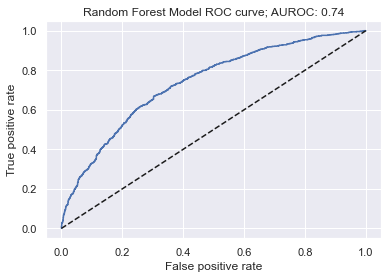

In [83]:
sns.set()

plt.plot(fpr_logreg, tpr_logreg)

plt.plot(fpr_logreg, fpr_logreg, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba_logreg), 2)

plt.title(f'Random Forest Model ROC curve; AUROC: {AUROC}');

plt.show()